### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1261]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1264]:
data = pd.read_csv('data/coupons.csv')

In [1266]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [1269]:
data.describe()

# rename "passanger" column to "passenger"
data = data.rename(columns={"passanger":"passenger"})

# get a count of how many values in each column are null
print(data.isnull().sum())

# The columns with missing values are:
#   car
#   Bar
#   CoffeeHouse
#   CarryAway
#   RestaurantLessThan20
#   Restaurant20to50
# everything else looks fully populated

# look at the distinct set of values for each of the remaining columns

# car
cars = data.loc[ data['car'].notnull() ]['car']
print(cars.unique()) # [list of unique values]
print(cars.count()) # = count of non-null values (108)

# Bar
bars = data.loc[ data['Bar'].notnull() ]['Bar']
print(bars.unique())

# CoffeeHouse
ch = data.loc[ data['CoffeeHouse'].notnull() ]['CoffeeHouse']
print(ch.unique())

# CarryAway
ca = data.loc[ data['CarryAway'].notnull() ]['CarryAway']
print(ca.unique())

# RestaurantLessThan20
rlt20 = data.loc[ data['RestaurantLessThan20'].notnull() ]['RestaurantLessThan20']
print(rlt20.unique())

# Restaurant20to50
r20to50 = data.loc[ data['Restaurant20To50'].notnull() ]['Restaurant20To50']
print(r20to50.unique())

# add a unique index column that we can use to merge on later
data['row_id'] = range(1, len(data.index) + 1)

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
['Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
108
['never' 'less1' '1~3' 'gt8' '4~8']
['never' 'less1' '4~8' '1~3' 'gt8']
['4~8' '1~3' 'gt8' 'less

3. Decide what to do about your missing data -- drop, replace, other...

In [1272]:
### Conclusion:
# car is not a useful column to use because:
#   1. there are only 108 populated rows
#   2. they do not represent a useful set for our analysis
# We will just ignore/drop this column
data = data.drop(columns='car')

# the rest of the columns look ok, but some of the values are null in a few of the columns.
# replace null values with "not responded"
data = data.fillna("Not Responded")

# summarize again to verify the changes
nocardata.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 

In [1275]:
# the proportion = count accepted / count total

# get the count of accepted observations
y_count = data.query('Y == 1').shape[0]
print("num accept: {}".format(y_count))

# get the total count of observations
tot_count = data.shape[0]
print("num tot: {}".format(tot_count))

# divide to get the proportion
proportion = y_count / tot_count
print("proportion accepted: {}".format(proportion))

num accept: 7210
num tot: 12684
proportion accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

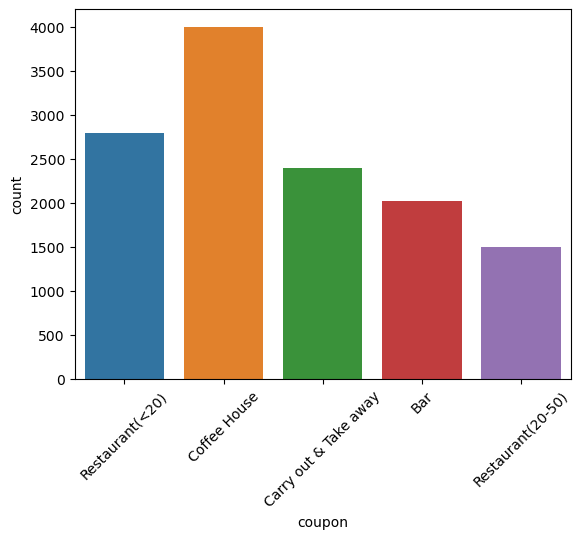

In [1278]:
coupon_data = data['coupon']
sns.countplot(data=coupon_data, x=coupon_data.index)
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

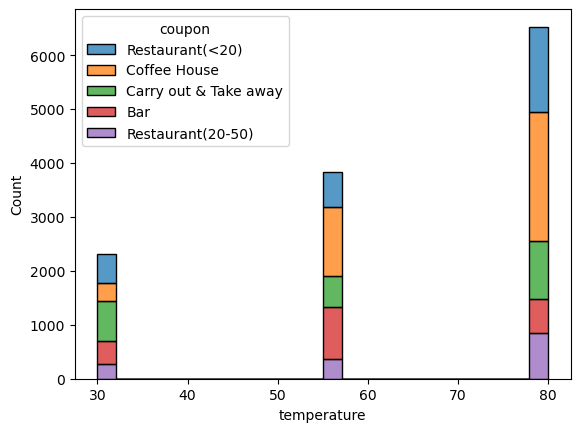

In [1281]:
temp_data = data[['temperature','coupon']]
#print(temp_data)
# there are only 3 temperature brackets, so it makes sense to use them
# on the x-axis and color by coupon type so we can see the contribution of each
sns.histplot(data=temp_data, x='temperature', hue='coupon', multiple='stack')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

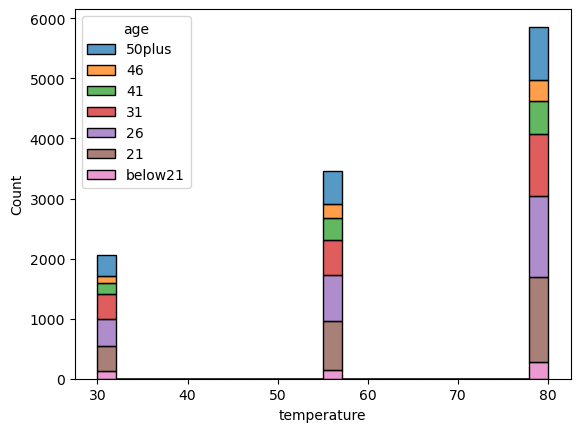

In [1283]:
temp_data = data[['temperature','age']]
#print(temp_data)

# plot the histogram again - this time color on age bracket
age_bracket_order = ['50plus','46','41','31','26','21','below21'] # order for the age brackets
sns.histplot(data=temp_data, x='temperature', hue='age', hue_order=age_bracket_order, multiple='stack')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

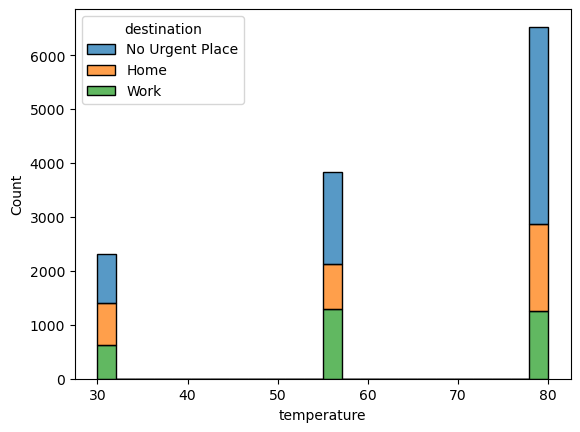

In [1285]:
temp_data = data[['temperature','destination']]
#print(temp_data)

# plot again - color on destination
sns.histplot(data=temp_data, x='temperature', hue='destination', multiple='stack')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

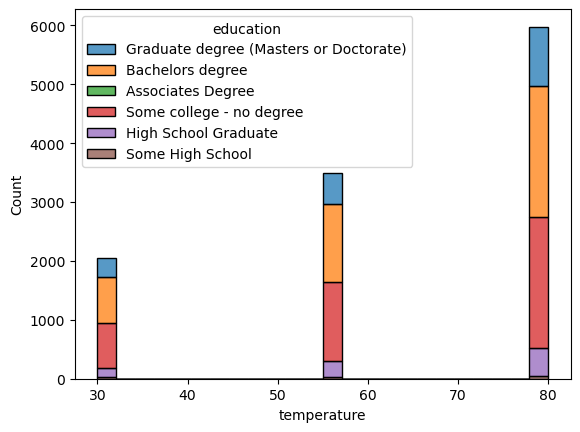

In [1287]:
temp_data = data[['temperature','education']]
#print(temp_data)

# plot again - color on education
education_bracket_order = ['Graduate degree (Masters or Doctorate)','Bachelors degree','Associates Degree','Some college - no degree','High School Graduate','Some High School']
sns.histplot(data=temp_data, x='temperature', hue='education', hue_order=education_bracket_order, multiple='stack')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='temperature'>

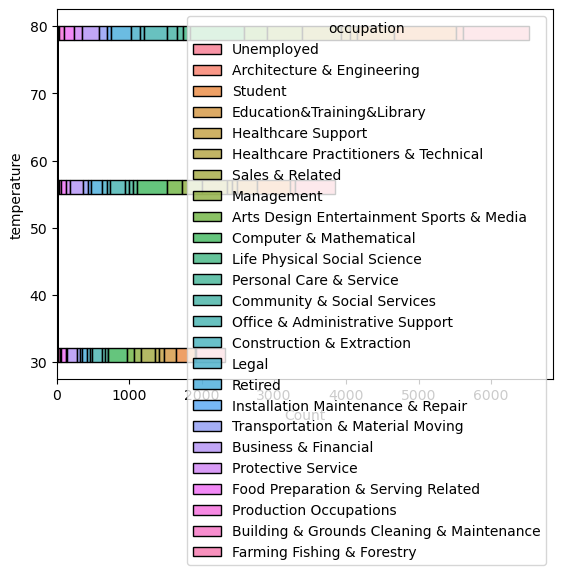

In [1289]:
temp_data = data[['temperature','occupation']]
#print(temp_data)

# break it down one more time by occupation
# there are so many occupations that I think it's easier to look at rotated
sns.histplot(data=temp_data, y='temperature', hue='occupation', multiple='stack')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1292]:
bar_df = data.loc[ data['coupon'] == 'Bar' ]
#bar_df.info()
#print(bar_df['coupon'])

2. What proportion of bar coupons were accepted?

In [1295]:
# get the count of bar coupons that were accepted
accepted_bar_coupon_count = bar_df.loc[ bar_df['Y'] == 1 ].shape[0]
print("accepted count: {}".format(accepted_bar_coupon_count))

# just checking the math
#rejected_bar_coupon_count = bar_df.loc[ bar_df['Y'] == 0].shape[0]
#print("rejected count: {}".format(rejected_bar_coupon_count))
#print("sum: {}".format(accepted_bar_coupon_count + rejected_bar_coupon_count))

# get the total count of bar coupons
total_bar_coupon_count = bar_df.shape[0]
print("tot count: {}".format(total_bar_coupon_count))

# proportion = no. accepted / no. total
proportion = accepted_bar_coupon_count / total_bar_coupon_count
print("proportion accepted: {}".format(proportion))

accepted count: 827
tot count: 2017
proportion accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [1298]:
# these categories represent people who went to a bar 3 or fewer times a month
three_or_less_categories = ['never', 'less1', '1~3']

# these categories represent people who went to the bar more than 3 times a month
more_than_three_categories = ['4~8', 'gt8']

# NOTE: some values in the Bar column are Not Responded so they need to be removed for this
#print(bar_df['Bar'].unique())
bar_df = bar_df.loc[ bar_df['Bar'] != 'Not Responded' ]

# remove the rows that have NaN in the Bar column
bar_df = bar_df.loc[ bar_df['Bar'].notna() ]

# check that the rows were removed (should be 0)
bar_df_nan = bar_df.loc[ bar_df['Bar'].isna() ]

bar_df_three_or_less = bar_df.loc[ bar_df['Bar'].isin(three_or_less_categories) ]
bar_df_more_than_three = bar_df.loc[ bar_df['Bar'].isin(more_than_three_categories) ]

# get the count of accepted and total count for the three or less categories
acc_3a = bar_df_three_or_less.loc[ bar_df_three_or_less['Y'] == 1 ].shape[0]
tot_3a = bar_df_three_or_less.shape[0]

# calculate the proportion of acceptance for the three or less categories
prop_3a = acc_3a / tot_3a
print("proportion of acceptance for 3 or less times a month: {} (={}/{})".format(prop_3a, acc_3a, tot_3a))

# get the count of accepted and total count for the more than 3 time a month categories
acc_3b = bar_df_more_than_three.loc[ bar_df_more_than_three['Y'] == 1 ].shape[0]
tot_3b = bar_df_more_than_three.shape[0]

# calculate the proportion of acceptance
prop_3b = acc_3b / tot_3b
print("proportion of acceptance for more than 3 times per month: {} (={}/{})".format(prop_3b, acc_3b, tot_3b))

proportion of acceptance for 3 or less times a month: 0.37061769616026713 (=666/1797)
proportion of acceptance for more than 3 times per month: 0.7688442211055276 (=153/199)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [1301]:
# these categories represent people who went to a bar more than once a month
bar_more_than_once_categories = ['1~3','4~8','gt8']

# these are age categories for people over 25
age_gt25_categories = ['26','31','36','41','46','50plus']

# create a dataframe to represent the test group
# 1. accepted the coupon
# 2. age > 25
# 3. visited a bar more than once a month

# create a dataframe to represent the entire group without regard to coupon acceptance
test_group_all_df = bar_df.loc[ (bar_df['age'].isin(age_gt25_categories)) & (bar_df['Bar'].isin(bar_more_than_once_categories)) ]

# now subset just the people who accepted coupons
test_group_acc_df = test_group_all_df.loc[ test_group_all_df['Y'] == 1 ]

# create a dataframe for the remaining records - everything that falls outside of the test group
remain_group_all_df = pd.merge(left=bar_df, right=test_group_all_df, indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)

# subset the records from the remaining group where the coupon was accepted
remain_group_acc_df = test_group_all_df.loc[ test_group_all_df['Y'] == 1 ]

#print("{} + {} = {}".format(test_group_all_df.shape[0], remain_group_all_df.shape[0], test_group_all_df.shape[0] + remain_group_all_df.shape[0]))

print("proportion of acceptance for test group: {}".format(test_group_acc_df.shape[0] / test_group_all_df.shape[0]))
print("proportion of acceptance for others: {}".format(remain_group_acc_df.shape[0] / remain_group_all_df.shape[0]))

proportion of acceptance for test group: 0.6952380952380952
proportion of acceptance for others: 0.18527918781725888


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [1304]:
#print("bar_df count: {}".format(bar_df.shape[0]))
#print(bar_df['passenger'].unique())

# these categories represent people who went to a bar more than once a month
bar_more_than_once_categories = ['1~3','4~8','gt8']

# these categories represent passengers that are not a kid
passenger_nokids_categories = ['Friend(s)','Partner'] # 'Kid(s)' and 'Alone' are excluded

# create a dataframe to represent the test group
# 1. accepted the coupon
# 2. age > 25
# 3. visited a bar more than once a month

# create a dataframe for the test group
test_group_all_df = bar_df.loc[ ~(bar_df['occupation'] == 'Farming Fishing & Forestry') & (bar_df['passenger'].isin(passenger_nokids_categories)) & (bar_df['Bar'].isin(bar_more_than_once_categories)) ]

# subset just the records where the coupon was accepted
test_group_acc_df = test_group_all_df.loc[  test_group_all_df['Y'] == 1 ]

# get the remaining records - use a left outer join and drop the overlapping rows
remain_group_all_df = pd.merge(left=bar_df, right=test_group_all_df, indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)

# get the subset of remaining people that accepted the coupon
remain_group_acc_df = remain_group_all_df.loc[ remain_group_all_df['Y'] == 1 ]

#print("sum of totals: {} + {} = {} (should be: {})".format(test_group_all_df.shape[0], remain_group_all_df.shape[0], test_group_all_df.shape[0] + remain_group_all_df.shape[0], bar_df.shape[0]))

print("proportion of acceptance for test group: {}".format(test_group_acc_df.shape[0] / test_group_all_df.shape[0]))
print("proportion of acceptance for others: {}".format(remain_group_acc_df.shape[0] / remain_group_all_df.shape[0]))

proportion of acceptance for test group: 0.717948717948718
proportion of acceptance for others: 0.3770127706829539


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [1307]:
# these categories represent people who went to a bar more than once a month
bar_more_than_once_categories = ['1~3','4~8','gt8']

# these categories represent passengers that are not a kid
passenger_nokids_categories = ['Friend(s)','Partner'] # 'Kid(s)' and 'Alone' are excluded

# these are age categories for people under 30
age_under30_categories = ['below21','21','26']

# these are RestauntLessThan20 categories for 4 or more visits a month
restaurant_more_than_4x_categories = ['4~8','gt8']

# these are income categories representing income less than 50k
income_lt50k_categories = ['$12500 - $24999','$25000 - $37499','$37500 - $49999']

# create dataframes to represent the test groups
# 1. visited a bar more than once a month AND
#    had a passenger that was not a kid AND
#    not a widow
# 2. visited a bar more than once a month AND
#    under age 30
# 3. go to cheap restaurants > 4x a month AND
#    income less than 50k

# get everyone in group 1, and then just the ones that accepted coupons
test_group1_all_df = bar_df.loc[ bar_df['Bar'].isin(bar_more_than_once_categories) & bar_df['passenger'].isin(passenger_nokids_categories) & ~(bar_df['maritalStatus'] == 'Widowed') ]
test_group1_acc_df = test_group1_all_df.loc[ test_group1_all_df['Y'] == 1 ]

print("proportion1: {}".format(test_group1_acc_df.shape[0] / test_group1_all_df.shape[0]))

# get everyone in group 2, and then just the ones that accepted coupons
test_group2_all_df = bar_df.loc[ bar_df['Bar'].isin(bar_more_than_once_categories) & bar_df['age'].isin(age_under30_categories) ]
test_group2_acc_df = test_group2_all_df.loc[ test_group2_all_df['Y'] == 1 ]

print("proportion2: {}".format(test_group2_acc_df.shape[0] / test_group2_all_df.shape[0]))

# get everyone in group 3, and then just the ones that accepted coupons
test_group3_all_df = bar_df.loc[ bar_df['RestaurantLessThan20'].isin(restaurant_more_than_4x_categories) & bar_df['income'].isin(income_lt50k_categories) ]
test_group3_acc_df = test_group3_all_df.loc[ test_group3_all_df['Y'] == 1 ]

print("proportion3: {}".format(test_group3_acc_df.shape[0] / test_group3_all_df.shape[0]))


proportion1: 0.717948717948718
proportion2: 0.7217391304347827
proportion3: 0.462406015037594


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [1312]:
# they are much more likely to visit bars more than once a month

### Independent Investigation
Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [1314]:
# compare the proportion of male vs female that accepted bar coupons

#print(data['gender'].unique())
#print(data['coupon'].unique())

# create a data frame of only the coupons for Bars
test_bar_all_df = data.loc[ data['coupon'] == 'Bar' ]

# create a subset of the Males who accepted Bar coupons
test_bar_acc_male_df = test_bar_all_df.loc[ (test_bar_all_df['gender'] == 'Male') & (test_bar_all_df['Y'] == 1) ]

# create a subset of the Females who accepted Bar coupons
test_bar_acc_female_df = test_bar_all_df.loc[ (test_bar_all_df['gender'] == 'Female') & (test_bar_all_df['Y'] == 1) ]

# calculate the proportions
prop_male = test_bar_acc_male_df.shape[0] / test_bar_all_df.shape[0]
prop_female = test_bar_acc_female_df.shape[0] / test_bar_all_df.shape[0]

print("proportion of Male gender that accepted a Bar coupon: {}".format(prop_male))
print("proportion of Female gender that accepted a Bar coupon: {}".format(prop_female))

# a higher percentage of Males accepted Bar coupons

proportion of Male gender that accepted a Bar coupon: 0.23351512146752604
proportion of Female gender that accepted a Bar coupon: 0.17649975210708974


In [1316]:
# compare the proportion of people with kids and without that accepted bar coupons

#print(data['has_children'].unique())

# create a data frame of only the coupons for Bars
test_bar_all_df = data.loc[ data['coupon'] == 'Bar' ]

# create a subset of the people with children who accepted Bar coupons
test_bar_acc_child_df = test_bar_all_df.loc[ (test_bar_all_df['has_children'] == 1) & (test_bar_all_df['Y'] == 1) ]

# create a subset of the people without children who accepted Bar coupons
test_bar_acc_nochild_df = test_bar_all_df.loc[ (test_bar_all_df['has_children'] == 0) & (test_bar_all_df['Y'] == 1) ]

# calculate the proportions
prop_male = test_bar_acc_child_df.shape[0] / test_bar_all_df.shape[0]
prop_female = test_bar_acc_nochild_df.shape[0] / test_bar_all_df.shape[0]

print("proportion of people with children that accepted a Bar coupon: {}".format(prop_male))
print("proportion of people without children that accepted a Bar coupon: {}".format(prop_female))

# over twice as many people without children accepted Bar coupons as people who have children!

proportion of people with children that accepted a Bar coupon: 0.12989588497768964
proportion of people without children that accepted a Bar coupon: 0.28011898859692613


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='maritalStatus', ylabel='Count'>

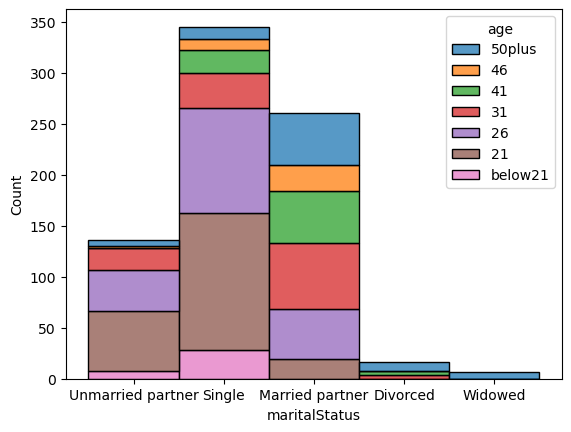

In [1318]:
# look at the ages and maritalStatus of people who accepted Bar coupons

# create a dataframe with just people who accepted Bar coupons
test_bar_all_df = data.loc[ (data['coupon'] == 'Bar') & (data['Y'] == 1) ]

# show the maritalStatus and age breakdown on a histogram
age_bracket_order = ['50plus','46','41','31','26','21','below21'] # order for the age brackets
sns.histplot(data=test_bar_all_df, x='maritalStatus', hue='age', hue_order=age_bracket_order, multiple='stack')

<Axes: xlabel='destination', ylabel='count'>

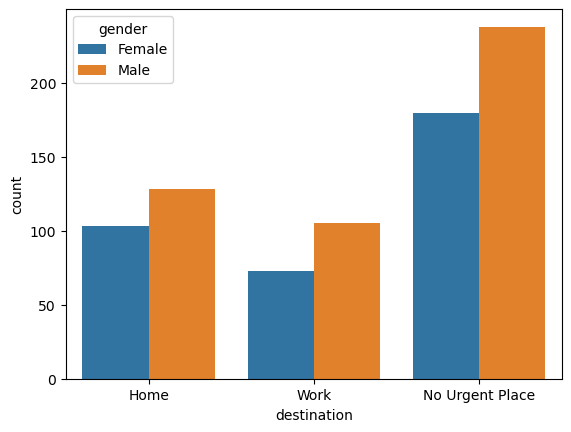

In [1320]:
# look at the destinations of men and women who accepted Bar coupons

# create a dataframe with just people who accepted Bar coupons
test_bar_all_df = data.loc[ (data['coupon'] == 'Bar') & (data['Y'] == 1) ]

# pull out the ages and show them on a histogram
destination_order = ['Home','Work','No Urgent Place']
sns.countplot(data=test_bar_all_df, x='destination', order=destination_order, hue='gender')

<Axes: xlabel='destination', ylabel='count'>

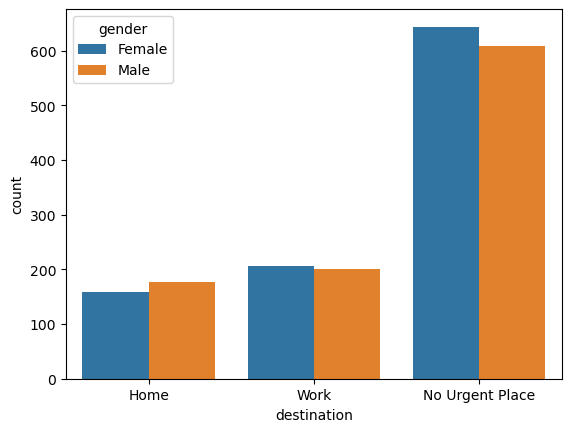

In [1322]:
# now look at the destinations of men and women who accepted Coffee coupons
#print(data['coupon'].unique())

# create a dataframe with just people who accepted Bar coupons
test_bar_all_df = data.loc[ (data['coupon'] == 'Coffee House') & (data['Y'] == 1) ]

# pull out the destinations and ages and show the on a histogram
destination_order = ['Home','Work','No Urgent Place']
sns.countplot(data=test_bar_all_df, x='destination', hue='gender', order=destination_order)

<Axes: xlabel='age', ylabel='count'>

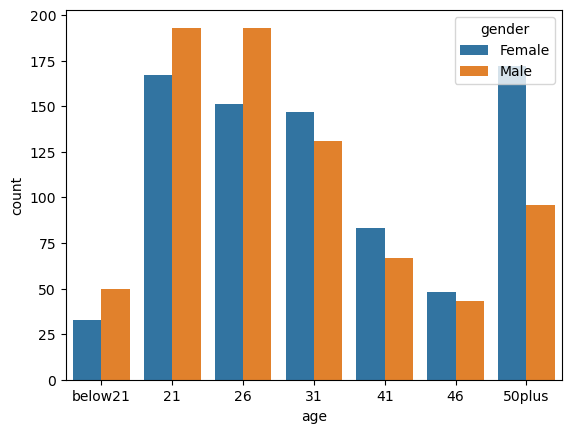

In [1324]:
# look at the ages of men and women who accepted Carry out & Take away coupons
#print(data['coupon'].unique())

# create a dataframe with just people who accepted Bar coupons
test_bar_all_df = data.loc[ (data['coupon'] == 'Carry out & Take away') & (data['Y'] == 1) ]

# pull out the ages and show them on a histogram
age_bracket_order = ['50plus','46','41','31','26','21','below21'] # order for the age brackets
sns.countplot(data=test_bar_all_df, x='age', order=reversed(age_bracket_order), hue='gender')

# I'm not sure what I really learned in this last one other than that it's not very easy to order the x-axis!!!